In [152]:
# Unit 5 - Financial Planning
# FRANK XU

In [153]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation


%matplotlib inline

In [151]:
# Load .env enviroment variables
load_dotenv()

True

In [14]:
# Part 1 - Personal Finance Planner

In [15]:
# Collect Crypto Prices Using the `requests` Library

In [16]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [17]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [18]:
# Fetch current BTC price
btc_request=requests.get(btc_url).json()
btc_request
btc_price=btc_request['data']['1']['quotes']['USD']['price']
btc_price

31587.0

In [19]:
# Fetch current ETH price
eth_request=requests.get(eth_url).json()
eth_request
eth_price=eth_request['data']['1027']['quotes']['USD']['price']

In [20]:
# Compute current value of my crpto
btc_value=btc_price*my_btc
eth_value=eth_price*my_eth





# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $37904.40
The current value of your 5.3 ETH is $4072.68


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [44]:
# Current amount of shares
my_spy=50


my_agg=200

In [45]:
# Set Alpaca API key and secret
# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_api_key="PKSNYC5TAWOYLMGXQEXX"
alpaca_secret_key="RURhjGAmGj6y6cS5LenP1EIiG3GTgflDVGlhsqOY"


# Create the Alpaca API object
api=tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")






In [46]:
# Format current date as ISO format
today=pd.Timestamp("2020-12-31",tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_prices=api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today).df

# Preview DataFrame
ticker_prices.head()

AGG                                     SPY  \
                             open    high     low  close   volume    open   
time                                                                        
2020-12-31 00:00:00-05:00  118.18  118.24  118.12  118.2  4325026  371.78   

                                                              
                             high      low   close    volume  
time                                                          
2020-12-31 00:00:00-05:00  374.66  371.232  373.85  52720911

In [47]:
# Pick AGG and SPY close prices
spy_close_price=ticker_prices['SPY']['close'][0]
agg_close_price=ticker_prices['AGG']['close'][0]




In [48]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.2
Current SPY closing price: $373.85


In [49]:
# Compute the current value of shares
my_spy_value=spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg



# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18692.50
The current value of your 200 AGG shares is $23640.00


### Savings Health Analysis

In [59]:
# Set monthly household income
monthly_income=12000


# Create savings DataFrame; create a DataFrame called `df_savings` with two rows. 
# Store the total value in dollars of the crypto assets in the first row and the total value of the shares in the second row.
savings=[btc_value+eth_value, my_spy_value+my_agg_value]
df_savings=pd.DataFrame(savings,
                       columns=["Amount"],
                       index=['cryto','shares'])

# Display savings DataFrame
df_savings

,Amount
cryto,41977.079
shares,42332.500


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

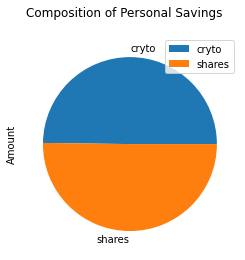

In [58]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, title="Composition of Personal Savings")

In [80]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings=int(df_savings.sum())

In [89]:
if total_savings > emergency_fund:
    print("Congrats-you have sufficient emergency funds!")
elif total_savings == emergency_fund:
    print("You have about sufficient emergency funds!")
else:
    print(f"You are short of ${(emergency_fund-total_savings)} for emergency funds!")

Congrats-you have sufficient emergency funds!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [83]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-12-31', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-12-31', tz='America/New_York').isoformat()

In [90]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data=api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df



# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2015-12-31 00:00:00-05:00  107.87  108.03  107.82  108.00  2792402.0  205.13   
2016-01-04 00:00:00-05:00  108.09  108.29  107.93  107.99  3427605.0  200.50   
2016-01-05 00:00:00-05:00  107.87  108.12  107.87  108.02  2564401.0  201.40   
2016-01-06 00:00:00-05:00  108.34  108.46  108.22  108.43  2674241.0  198.34   
2016-01-07 00:00:00-05:00  108.40  108.47  108.21  108.43  2267940.0  195.33   

                                                              
                             high     low   close     volume  
time                                                          
2015-12-31 00:00:00-05:00  205.89  203.87  203.93   78736949  
2016-01-04 00:00:00-05:00  201.03  198.59  200.99  151908002  
2016-01-05 00:00:00-05:00  201.90  200.05  201.43   90242524  
2016-01-06 00:00:00-05:00  200.06  197.60  198.79  118917648  
2016-01-07 00:00:00-05:00  198.82  193.59  194.01  174230042

In [98]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
Thirty_year_returns=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30)






In [100]:
# Printing the simulation input data
Thirty_year_returns.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2015-12-31 00:00:00-05:00  107.87  108.03  107.82  108.00  2792402.0   
2016-01-04 00:00:00-05:00  108.09  108.29  107.93  107.99  3427605.0   
2016-01-05 00:00:00-05:00  107.87  108.12  107.87  108.02  2564401.0   
2016-01-06 00:00:00-05:00  108.34  108.46  108.22  108.43  2674241.0   
2016-01-07 00:00:00-05:00  108.40  108.47  108.21  108.43  2267940.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-12-31 00:00:00-05:00          NaN  205.13  205.89  203.87  203.93   
2016-01-04 00:00:00-05:00    -0.000093  200.50  201.03  198.59  200.99   
2016-01-05 00:00:00-05:00     0.000278  201.40  201.90  200.05  201.43   
2016-01-06 00:00:00-05:00     0.003796  198.34  200.06  197.60  198.79   
2016-01-07 00:00:00-05:00     0.000000  195.33  198.82  193.59  194.01   

                                                   
                              volume daily_return  
time                                               
2015-12-31 00:00:00-05:00   78736949          NaN  
2016-01-04 00:00:00-05:00  151908002    -0.014417  
2016-01-05 00:00:00-05:00   90242524     0.002189  
2016-01-06 00:00:00-05:00  118917648    -0.013106  
2016-01-07 00:00:00-05:00  174230042    -0.024045

In [101]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Thirty_year_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999705,1.002375,1.004403,1.005308,1.001381,1.006087,1.007753,0.997433,0.996032,1.016267,...,1.011680,0.998643,1.005515,0.999494,1.005439,0.980089,0.995065,1.002045,0.995157,0.993120
2,1.006792,0.999092,0.990000,0.999625,1.011032,0.998291,1.010400,0.989470,0.988995,1.023732,...,1.026756,1.005205,1.011522,1.006517,1.013900,0.987568,0.994185,1.009251,0.991379,0.992905
3,1.006330,1.003221,0.993363,0.986240,1.015599,0.995075,1.012059,0.986227,0.976352,1.031015,...,1.017971,1.006358,1.027086,0.998100,1.015953,0.984807,0.991908,1.019903,0.984991,0.996199
4,1.012148,1.002405,0.995615,0.984953,1.013800,0.997202,1.012892,0.976516,0.973401,1.035136,...,1.022113,0.998365,1.031549,0.997240,1.026715,0.979194,0.988212,1.019236,0.985427,0.995914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.902202,11.060849,6.662937,6.704548,5.900343,17.304709,26.527604,12.477554,18.267758,16.557999,...,13.571034,8.430349,24.425551,4.476763,29.412985,16.476223,26.097371,6.369157,39.186721,20.417639
7557,4.923842,11.084235,6.636617,6.691781,5.914499,17.426344,26.409198,12.426418,18.335797,16.615633,...,13.551073,8.417845,24.162455,4.456465,29.257967,16.446405,26.308588,6.393673,38.973030,20.508161
7558,4.967942,11.037993,6.670689,6.797855,5.888341,17.428703,26.234613,12.552638,18.260277,16.600648,...,13.535110,8.415261,24.045647,4.437592,29.540233,16.371110,26.466836,6.397004,39.026396,20.453136
7559,4.983805,11.228839,6.738699,6.781004,5.863109,17.358423,25.762236,12.660829,18.118295,16.633119,...,13.594464,8.463702,24.126373,4.401886,29.710657,16.424292,26.489501,6.413348,38.929608,20.427167


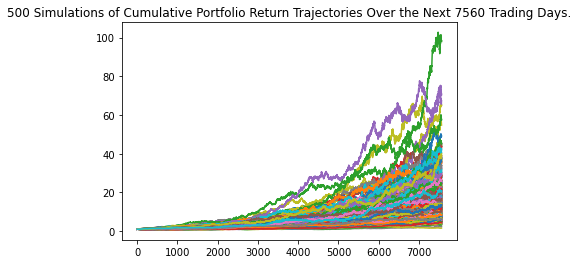

In [110]:
# Plot simulation outcomes
plot=Thirty_year_returns.plot_simulation()

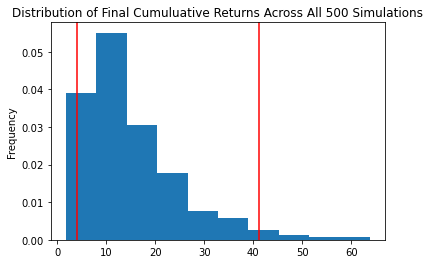

In [109]:
# Plot probability distribution and confidence intervals
Dist_plot=Thirty_year_return.plot_distribution()

### Retirement Analysis

In [111]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = Thirty_year_returns.summarize_cumulative_return()


# Print summary statistics
print(tbl)

count           500.000000
mean             15.190167
std              10.750076
min               1.552707
25%               8.000694
50%              12.418106
75%              18.861713
max              97.939867
95% CI Lower      4.049712
95% CI Upper     43.632134
Name: 7560, dtype: float64


In [114]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 
# '$20,000' initial investment.

In [112]:
# Set initial investment
initial_investment = 20000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80994.23 and $872642.68


In [ ]:
# Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [113]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $121491.35 and $1308964.03


In [ ]:
# Optional Challenge - Early Retirement
# Five Years Retirement Option

In [115]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
Five_year_forcast=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*5)





In [116]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
Five_year_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998041,1.005039,0.999686,0.993463,1.000398,0.981444,1.000454,0.987622,1.004768,1.000477,...,0.998298,1.004420,0.995723,1.002959,1.015929,1.010004,0.993829,1.003747,1.000664,0.999905
2,1.007458,0.996372,1.010865,0.994158,1.001912,0.982179,1.002502,0.996901,0.997523,0.989378,...,1.007421,0.987842,0.996396,1.002814,1.027522,1.004226,0.983341,1.010245,0.997386,1.007545
3,1.003449,0.995278,1.004645,0.984246,1.002220,0.968774,0.990896,0.993026,0.998625,0.996732,...,1.013493,0.990141,0.994837,1.000465,1.020047,0.994456,0.980378,1.013755,1.005856,1.001828
4,1.001635,0.996691,0.999442,0.991693,1.009395,0.968310,0.986461,0.984710,1.006488,1.002671,...,1.013596,0.991538,1.000186,1.001149,1.023971,0.999435,0.989239,1.014010,0.996667,1.001522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.142069,1.761188,1.526325,1.157727,0.811070,1.141712,1.049660,0.941133,1.561401,1.206963,...,2.108939,2.155543,1.501378,2.023003,1.031088,1.349945,1.684617,1.288695,1.103885,1.811505
1257,1.135691,1.755932,1.520012,1.157344,0.808608,1.146660,1.046863,0.938874,1.555892,1.221400,...,2.120419,2.165389,1.504131,2.025906,1.046144,1.327493,1.704857,1.295413,1.085327,1.796886
1258,1.119075,1.749973,1.505580,1.161117,0.806218,1.142096,1.056537,0.944822,1.556105,1.226256,...,2.117536,2.185520,1.518920,2.016457,1.042578,1.334225,1.725287,1.311367,1.085208,1.783891
1259,1.118218,1.776172,1.504844,1.156431,0.802967,1.141564,1.042556,0.943971,1.553930,1.211211,...,2.142836,2.194661,1.523102,2.013620,1.042196,1.334693,1.709108,1.304642,1.081103,1.783230


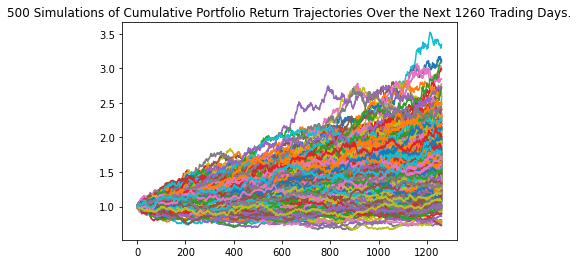

In [118]:
# Plot simulation outcomes
plot=Five_year_forcast.plot_simulation()

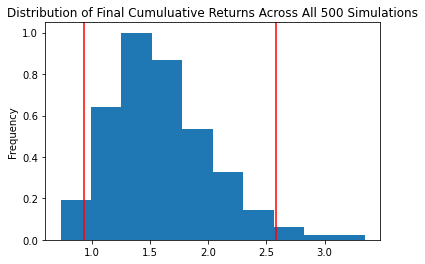

In [120]:
# Plot probability distribution and confidence intervals
dist_plot=Five_year_forcast.plot_distribution()

In [142]:
# Fetch summary statistics from the Monte Carlo simulation results
Five_year_tbl=Five_year_forcast.summarize_cumulative_return()


# Print summary statistics
Five_year_tbl[:]

count           500.000000
mean              1.595073
std               0.433675
min               0.726818
25%               1.294939
50%               1.532517
75%               1.841336
max               3.347711
95% CI Lower      0.931521
95% CI Upper      2.579249
Name: 1260, dtype: float64

In [144]:
# Set initial investment
initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(Five_year_tbl[8]*initial_investment,2)
ci_upper_five=round(Five_year_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55891.27 and $154754.92


### Ten Years Retirement Option

In [145]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
Ten_year_forcast=MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*10)





In [146]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Ten_year_forcast.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001762,1.008427,1.002803,1.012155,1.011439,0.996687,1.004160,0.993176,0.992117,1.007577,...,0.998563,1.000758,1.000829,0.988443,0.987458,0.999986,1.009567,0.996279,1.004163,0.997686
2,1.000505,1.006283,1.000908,1.022474,1.026429,0.986431,1.007840,0.994257,0.998612,1.014033,...,0.996394,1.002085,1.002134,0.997118,0.989026,0.994467,1.010764,0.995624,0.998731,1.005385
3,0.999464,0.999237,0.995882,1.016818,1.019488,0.982151,1.008687,0.991733,1.015629,1.012124,...,0.979096,1.012428,1.012020,1.006479,0.995221,0.987734,1.023256,0.985361,1.009607,1.010547
4,1.004016,1.006839,1.004756,1.025320,1.028823,0.979799,1.003095,0.992651,1.018172,1.011437,...,0.978982,1.015236,1.014868,1.010720,0.997962,0.981588,1.021202,0.982091,1.012221,1.003656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.814821,2.447763,4.031776,3.390273,1.826048,2.227213,3.678049,1.534560,1.934126,3.711044,...,2.183554,2.366464,1.246932,2.671678,3.146072,2.049494,1.293360,1.903493,1.417238,1.323720
2517,1.824438,2.447564,4.044651,3.384983,1.819865,2.221226,3.701690,1.551256,1.933143,3.720069,...,2.194486,2.367242,1.251425,2.701675,3.186387,2.037637,1.307641,1.887435,1.398057,1.323181
2518,1.820349,2.443314,4.032107,3.383823,1.821024,2.250558,3.720180,1.522659,1.956082,3.708789,...,2.207341,2.390548,1.246810,2.683118,3.254819,2.016662,1.317698,1.874075,1.378821,1.324363
2519,1.823473,2.431599,4.043337,3.364752,1.830462,2.276775,3.727083,1.535125,1.976330,3.721725,...,2.213277,2.379430,1.245365,2.671533,3.256116,2.011770,1.326655,1.867793,1.391123,1.326774


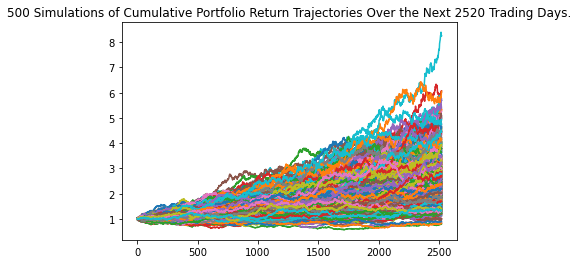

In [147]:
# Plot simulation outcomes
Ten_year_plot=Ten_year_forcast.plot_simulation()

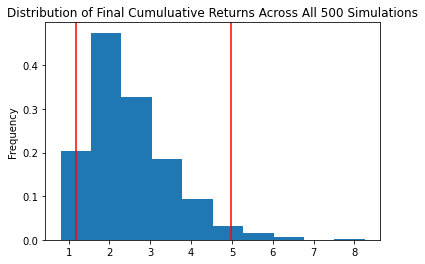

In [148]:
# Plot probability distribution and confidence intervals
Ten_dist_plot=Ten_year_forcast.plot_distribution()

In [149]:
# Fetch summary statistics from the Monte Carlo simulation results
Ten_year_tbl=Ten_year_forcast.summarize_cumulative_return()



# Print summary statistics
Ten_year_tbl[:]

count           500.000000
mean              2.490156
std               1.012272
min               0.802348
25%               1.760502
50%               2.273503
75%               3.035297
max               8.255861
95% CI Lower      1.191664
95% CI Upper      4.987893
Name: 2520, dtype: float64

In [150]:
# Set initial investment
initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(Ten_year_tbl[8] * initial_investment,2)
ci_upper_ten = round(Ten_year_tbl[9] * initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71499.83 and $299273.58
